<a href="https://colab.research.google.com/github/peasant87/iesb-deep-learning/blob/master/F9342497_EmpresarialAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empresarial Analytics


## Questão 1


1. **Estratégia de atuação integrada que leve o projeto a cumprir o
objetivo citado (maturidade analítica).**

2. **Quais tipos de dados devem alimentar o data lake para subsidiar
modelos essenciais para a BB Seguros.**

3. **Esboce como você organizaria esses dados e quais recursos do
Hadoop e do Hive utilizaria para garantir: continuidade de negócios,
alto desempenho em consultas, qualidade de dados e fácil
administração.**


---



Considerando que as três coligadas compartilham um Data Lake com infraestrutura Hadoop, pode-se inferir que já avançaram nos estágios iniciais de maturidade analítica caminhando em direção às estratégias de automação e inteligência artificial, com sistemas de suporte à decisão e análises preditivas.

Para que este objetivo, maturidade analítica, possa seguir conforme o planejado é necessário o desenvolvimento de uma cultura analítica na empresa, readequando os níveis estratégico, tático e operacional. 

O primeiro deve desenvolver a capacidade de definir os objetivos, os problemas a serem explorados pelo motor analítico da corporação. O segundo, deve trabalhar em conjunto com as equipes de análise, uma vez que as regras e insights negociais são provenientes da observação e retroalimentação dos sistemas analíticos. A capacidade de ter uma grande quantidade de dados e informações não traz valor em si, o valor está no processo de transformação e na forma como é entregue ao cliente, caso contrário Wikipédia dominaria a internet, não Google/Facebook. Por fim, deve-se ter uma equipe integrada de suporte tecnológico trabalhando em conjunto com a equipe de análise de dados, estatísticos, matemáticos etc. 

Mais do que os dados que devem ser alimentados no data lake, deve-se ter cuidado com o acumulo desnecessário de dados, transformando o data lake em um data swamp. Esta sobrecarga de dados afoga os métodos de análise impedindo ou atrasando a gearção de insights e modelos.

Como a BBSeguros está sujeita a diferentes tipos de risco de mercado e negócio, por exemplo, o data lake deve consistir de dados internos da própria empresa e dados que possam gerar valor e/ou tenham utilização relevante, como dados de mercado, tendências comerciais e econômicas. 

O data lake deve ter suporte a dados capazes de gerar insights sobre risco de fraude ao seguro, estabelecendo modelos capazes de predizer, de certa forma, estes eventos. Certos indicadores econômicos e sociais também podem ser levados em conta para o estabelecimento de uma política de preço de prêmio mais adequado ao perfil do cliente. O CLV (Customer Lifetime Value), também pode ser calculado a partir dos dados disponíveis.

Por fim, outros pontos que podem ser avaliados utilizando-se o data lake: marketing personalizado, segmentação de clientes, ferramentas de recomendação, gerenciamento de risco, predição de sinistros e desembolsos, automatização dos "eventos de vida", dos clientes, segmentando ofertas, valores e coberturas de forma personalizada.

Anteriormente ao Hadoop e Hive, é necessário estabelecer-se uma política de armazenamento, organizações e utilização do data lake. Deve-se estabelecer, previamente, uma organização e  estruturas mínimas para esta base de dados, com governança sobre o processo de inclusão, facilitando a consulta e manutenção dessa estrutura no futuro. 

Uma das formas de se realizar esta organização é criando-se zonas dentro do data lake, por exemplo, zona temporária, para dados de curto ciclo de vida (cópias, processamento). Zona de "estado bruto", onde dados "crus" serão armazenados, encriptados, etc. Zona segura, onde os dados foram avaliados, validados, tem relevância. Por fim, a zona refinada, onde dados manipulados e enriquecidos ficam armazenados.

Para uma boa continuidade dos negócios e confiabilidade da base de dados, necessitamos de uma boa política de segurança. Este ponto já é resolvido internamente pelo HDFS, com sua encriptação de ponta-a-ponta e pode ser melhorado utilizando-se o Apache Sentry.

Para o alto desempenho em consultas e continuidade dos negócios pode-se utilizar o Zookeeper com Apache Storm, o primeiro responsável alta confiabilidade na coordenação das bases de dados distribuídas, o segundo pela computação distribuída. Ainda na questão das consultas pode-se utilizar o Apache Hive para realização de queries SQL-Like no data lake, bem como outras implementações (HAWQ, HCatalog) e o Apache MRQL, otimizador de queries em sistemas distribuídos, de larga escala.

Para manutenção e administração dos dados, como ciclo de vida, pre-processamento, workflow, pode-se utilizar o Apache Falcon. 

## Questão 2



> **Utilize a amostra de dados chamada
JUNIOR e demonstre se a ações de 2018 trouxeram incremento na quantidade
de aportes e argumente se é viável continuar com esse tipo de campanha para
nos próximos 2 anos.**


---

In [0]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

%matplotlib inline

### Acessar dados no Drive

In [694]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exploração dos Dados

In [695]:
docs_path = '/content/drive/My Drive/Colab Notebooks/BB_Seguros/'
df = pd.read_csv(docs_path+'JUNIOR.csv', encoding='iso-8859-1',sep=';')
df.head()

,ID_CLIENTE,IDADE,CEP,REGIAO,uf,municipio,bairro,estado_civil,renda_liquida,PLANO,PERIODICIDADE_CONTRIBUICAO,CONTRIBUICAO,CANAL_VENDA,forma_pgto,QTD_APORTE_ESPO,SOMA_ESPORADICO,MEDIA_ESPORADICO,MAXIMO_ESPORADICO,BENEFICIARIO,IDADE_BENEFICIARIO,SEXO_BENEFICIARIO,APORTE_CAMPANHA,APORTE_SEM_CAMPANHA
0,1,62,86020080,SUL,PR,LONDRINA,CENTRO,Solteiro,12127.93,BRASILPREV JUNIOR ESTILO VGBL,MENSAL,98.31,AGENCIAS BB,Conta Corrente,NaN,NaN,NaN,NaN,1,14,F,NaN,3500.0
1,2,53,86300000,SUL,PR,CORNELIO PROCOPIO,CENTRO,Casado - Comunhao Parcial,2459.60,BRASILPREV JUNIOR VGBL,MENSAL,60.00,AGENCIAS BB,Conta Corrente,1.0,300.0,300.0,300.0,1,27,F,NaN,NaN
2,3,66,86050270,SUL,PR,LONDRINA,B SUICA,Casado - Comunhao Universal,7798.01,BRASILPREV JUNIOR VGBL,MENSAL,25.00,AGENCIAS BB,Conta Corrente,NaN,NaN,NaN,NaN,1,9,F,NaN,NaN
3,4,51,86360000,SUL,PR,BANDEIRANTES,CENTRO,Casado - Comunhao Parcial,9924.59,BRASILPREV JUNIOR PGBL,MENSAL,150.00,AGENCIAS BB,Conta Corrente,NaN,NaN,NaN,NaN,1,14,M,NaN,NaN
4,5,57,86870000,SUL,PR,IVAIPORA,CENTRO,Casado - Comunhao Parcial,15139.01,BRASILPREV JUNIOR VGBL,OUTRA,750.00,AGENCIAS BB,Boleto,NaN,NaN,NaN,NaN,1,21,M,NaN,NaN


In [0]:
# Limitando colunas utilizadas

del df['IDADE']
del df['CEP']
del df['REGIAO']
del df['uf']
del df['municipio']
del df['bairro']
del df['estado_civil']
del df['CANAL_VENDA']
del df['BENEFICIARIO']
del df['IDADE_BENEFICIARIO']
del df['SEXO_BENEFICIARIO']

In [697]:
# Verificando número de amostras e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
ID_CLIENTE                    4000 non-null int64
renda_liquida                 3986 non-null float64
PLANO                         4000 non-null object
PERIODICIDADE_CONTRIBUICAO    4000 non-null object
CONTRIBUICAO                  4000 non-null float64
forma_pgto                    4000 non-null object
QTD_APORTE_ESPO               423 non-null float64
SOMA_ESPORADICO               423 non-null float64
MEDIA_ESPORADICO              423 non-null float64
MAXIMO_ESPORADICO             423 non-null float64
APORTE_CAMPANHA               315 non-null float64
APORTE_SEM_CAMPANHA           211 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 375.1+ KB


In [0]:
df['APORTE_CAMPANHA'] = df.APORTE_CAMPANHA.fillna(0)
df['APORTE_SEM_CAMPANHA'] = df.APORTE_SEM_CAMPANHA.fillna(0)
df['QTD_APORTE_ESPO'] = df.QTD_APORTE_ESPO.fillna(0)

[]

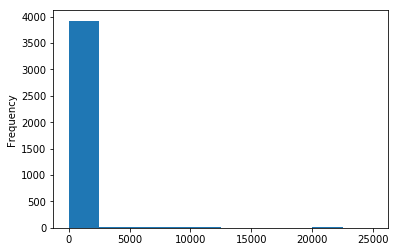

In [699]:
# Verificando a distribuição dos dados da coluna "APORTE CAMPANHA"
df['APORTE_CAMPANHA'].plot(kind='hist')
plt.plot()

[]

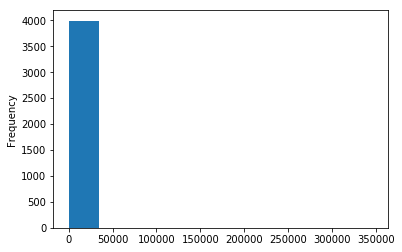

In [700]:
# Verificando a distribuição dos dados da coluna "APORTE SEM CAMPANHA"

df['APORTE_SEM_CAMPANHA'].plot(kind='hist')
plt.plot()

Pode-se observar que estes histogramas não seguem a distribuição normal, o que interfere na análise subsequente dos dados.

Agrupando os clientes que realizaram aporte durante a campanha, temos as seguites informações:

*   315 clientes realizaram aportes durante a campanha. 
*   A média destes aportes foi de R\$ 2677,90 e desvio-padrão de R\$ 4401,19
*   50% destes clientes realizaram aportes de até R\$ 800,00


In [701]:
df_sucesso_campanha = df[df['APORTE_CAMPANHA'] != 0]
df_sucesso_campanha.describe()

,ID_CLIENTE,renda_liquida,CONTRIBUICAO,QTD_APORTE_ESPO,SOMA_ESPORADICO,MEDIA_ESPORADICO,MAXIMO_ESPORADICO,APORTE_CAMPANHA,APORTE_SEM_CAMPANHA
count,315.000000,314.000000,315.000000,315.000000,173.000000,173.000000,173.000000,315.000000,315.0
mean,2123.984127,13343.537261,1311.635048,2.101587,3498.407919,1774.647225,2172.413584,2677.902571,0.0
std,1165.261386,10293.130938,4873.900546,4.332792,6560.383636,2949.446804,3235.076412,4401.199399,0.0
min,27.000000,209.650000,25.000000,0.000000,80.000000,50.000000,50.000000,50.000000,0.0
25%,1165.500000,6483.930000,100.000000,0.000000,650.000000,250.000000,300.000000,347.500000,0.0
50%,2291.000000,10510.980000,150.000000,1.000000,2000.000000,633.330000,1000.000000,800.000000,0.0
75%,3102.500000,17733.355000,250.000000,2.000000,4840.000000,2000.000000,2700.000000,2400.000000,0.0
max,3998.000000,75727.700000,50050.000000,47.000000,73200.000000,25000.000000,25000.000000,25000.000000,0.0


No gráfico visualizamos melhor a distribuição do valor destes aportes durante a campanha.

[]

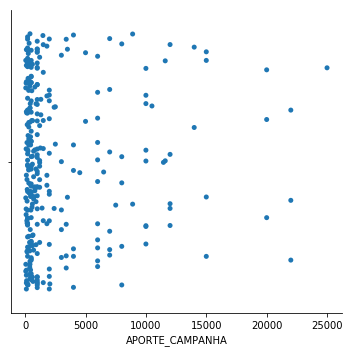

In [702]:
sns.catplot(x='APORTE_CAMPANHA', data=df_sucesso_campanha)
plt.plot()

Dentre os clientes que foram abordados com sucesso:

*   **142 não haviam feito contribuições esporádicas nos últimos 12 meses , o que corresponde a 45,07% dos clientes que fizeram aporte durante a campanha**.
*   A contribuição média destes clientes foi de R\$ 2766,21 e desvio-padrão de R\$ 4566,41
*   50% destas contribuições foram de até R\$ 1000,00

In [703]:
df_sucesso_campanha[df['QTD_APORTE_ESPO'] == 0].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID_CLIENTE,renda_liquida,CONTRIBUICAO,QTD_APORTE_ESPO,SOMA_ESPORADICO,MEDIA_ESPORADICO,MAXIMO_ESPORADICO,APORTE_CAMPANHA,APORTE_SEM_CAMPANHA
count,142.000000,142.000000,142.000000,142.0,0.0,0.0,0.0,142.000000,142.0
mean,2148.591549,12465.821761,1530.845704,0.0,NaN,NaN,NaN,2766.216479,0.0
std,1144.992274,7817.914208,6489.621067,0.0,NaN,NaN,NaN,4566.414357,0.0
min,27.000000,576.300000,50.000000,0.0,NaN,NaN,NaN,50.000000,0.0
25%,1237.000000,6726.390000,100.000000,0.0,NaN,NaN,NaN,400.000000,0.0
50%,2314.500000,10510.980000,150.000000,0.0,NaN,NaN,NaN,1000.000000,0.0
75%,3014.750000,17225.210000,210.405000,0.0,NaN,NaN,NaN,3000.000000,0.0
max,3978.000000,45220.630000,50050.000000,0.0,NaN,NaN,NaN,22000.000000,0.0


Dentre os clientes que realizaram aportes durante o período da campanha mas **NÃO** foram abordados temos as informações abaixo:

*   211 clientes que realizaram aportes sem terem participado da campanha
*   Aporte médio de R\$ 8196,04 e desvio-padrão de R\$ 30779,33
*   50% dos aportes foram de até R\$ 1000,00
*   **76 destes clientes, ou 36,01%, já haviam feito aportes esporádicos nos últimos 12 meses**

In [704]:
df_sem_campanha = df[df['APORTE_SEM_CAMPANHA'] != 0]
df_sem_campanha.describe()

,ID_CLIENTE,renda_liquida,CONTRIBUICAO,QTD_APORTE_ESPO,SOMA_ESPORADICO,MEDIA_ESPORADICO,MAXIMO_ESPORADICO,APORTE_CAMPANHA,APORTE_SEM_CAMPANHA
count,211.000000,210.000000,211.000000,211.000000,76.000000,76.000000,76.000000,211.0,211.000000
mean,2025.417062,11811.542190,4106.359953,0.900474,11559.936579,5154.449474,6150.635000,0.0,8196.044834
std,1158.175481,15712.543325,21325.372282,2.215648,49688.053681,13492.724014,15866.841839,0.0,30779.331313
min,1.000000,0.000000,25.000000,0.000000,100.000000,70.000000,100.000000,0.0,50.000000
25%,1083.500000,3247.230000,77.115000,0.000000,677.500000,394.497500,500.000000,0.0,500.000000
50%,1983.000000,7101.795000,124.290000,0.000000,1960.000000,1000.000000,1000.000000,0.0,1100.000000
75%,2997.500000,16038.157500,250.000000,1.000000,6000.000000,3625.000000,4400.000000,0.0,5000.000000
max,3974.000000,156162.290000,240000.000000,16.000000,423283.330000,101000.000000,101000.000000,0.0,346632.990000


In [705]:
# Correlação entre a quantidade de aportes esporádicos e os aportes sem campanha

df['QTD_APORTE_ESPO'].corr(df['APORTE_SEM_CAMPANHA'])

0.09970629389512428

In [706]:
# Correlação entre a quantidade de aportes esporádicos e os aportes da campanha

df['QTD_APORTE_ESPO'].corr(df['APORTE_CAMPANHA'])

0.0943603948508248

### Conclusão

Como pode-se ver não há correlação significativa entre o aporte de recursos e a participação ou não do cliente durante a campanha. Além do mais, os clientes "sem abordagem", que estavam a mais de 12 meses sem realizar aportes, realizaram um percentual maior de contribuições do que os que participaram da campanha, aproximadamente, 64% a 45%, respectivamente.

Considerando que também não há grande diferença entre os 50% menores aportes do grupo que participou da campanha e o que não participou, ademais os custos envolvidos na mobilização e no contato com o cliente, sugiro uma readequação da campanha para maior efetividade.

## Questão 3

> **Sendo você um candidato para atuar na nossa equipe, utilize a amostra
de dados chamada PROTEGIDO, construa análises ou modelos que produzam
insights que auxiliem na entrega deste desafio.
Demonstre suas análises/modelos e conclusões, pense em uma
campanha comercial ou de relacionamento que permita testar e validar seus
insights.**


---

In [0]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn import preprocessing
import statsmodels.api as sm

In [708]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exploração de Dados

In [709]:
docs_path = '/content/drive/My Drive/Colab Notebooks/BB_Seguros/'
df = pd.read_csv(docs_path+'PROTEGIDO.csv', encoding='iso-8859-1',sep=';')
df.head()

,IN_PROTEGIDO,ID_CLIENTE,IDADE,estado_civil,grau_instrucao,renda_liquida,CEP,REGIAO,uf,municipio,bairro,ID_CDC,LINHA_CDC,CANAL_CDC,VALOR_CDC,VALOR_PARCELA,VALOR_PREMIO,BENEFICIARIO_SEGURO,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
0,0,779,59,Divorciado,Pos-Graduacao,7678.46,79010600,CENTRO-OESTE,MS,CAMPO GRANDE,CEL ANTONINO,1314,BB CREDITO 13 SALARIO,MOBILE,"1.552,23","2.274,76",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
1,0,827,64,Solteiro,Segundo Grau,8564.43,79010600,CENTRO-OESTE,MS,CAMPO GRANDE,CEL ANTONINO,1398,BB CREDITO 13 SALARIO,MOBILE,"3.239,82","4.265,70",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
2,0,1424,50,Solteiro,Superior Completo,5424.71,87970000,SUL,PR,NOVA LONDRINA,CENTRO,2517,BB CREDITO PARCELAMENTO CHEQUE ESPECIAL,MOBILE,"986,92","368,72",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
3,0,1936,46,Casado - Comunhao Parcial,Pos-Graduacao,3102.33,87013050,SUL,PR,MARINGA,ZONA 01,3401,BB CREDITO SALARIO FUNCI,MOBILE,"2.622,04","44,89",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
4,0,2414,33,Casado - Comunhao Parcial,Primeiro Grau,1310.21,37948000,SUDESTE,MG,BOM JESUS DA PENHA,CENTRO,4246,BB CREDITO 13 SALARIO,MOBILE,"118,38","167,58",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064


In [710]:
# Verificando número de amostras e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
IN_PROTEGIDO           2000 non-null int64
ID_CLIENTE             2000 non-null int64
IDADE                  2000 non-null int64
estado_civil           1979 non-null object
grau_instrucao         1979 non-null object
renda_liquida          1976 non-null float64
CEP                    2000 non-null int64
REGIAO                 2000 non-null object
uf                     2000 non-null object
municipio              2000 non-null object
bairro                 2000 non-null object
ID_CDC                 2000 non-null int64
LINHA_CDC              2000 non-null object
CANAL_CDC              2000 non-null object
VALOR_CDC              2000 non-null object
VALOR_PARCELA          2000 non-null object
VALOR_PREMIO           128 non-null object
BENEFICIARIO_SEGURO    128 non-null object
Total                  2000 non-null int64
AllocProportion        2000 non-null float64
SampleSize         

In [711]:
# Verificando os labels
# 0 -> não tem seguro protegido
# 1 -> tem seguro protegido
  df.IN_PROTEGIDO.value_counts()

0    1872
1     128
Name: IN_PROTEGIDO, dtype: int64

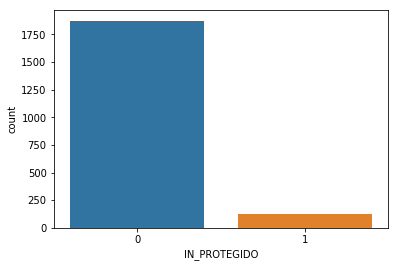

In [712]:
# Plotagem do gráfico dos dados acima, evidênciando a diferença entre os segurados e não-segurados
sns.countplot(x='IN_PROTEGIDO',data=df)
plt.show()

In [713]:
# Separação dos dados do seguro cŕedito protegido para visualização
df_protegido = df[df['IN_PROTEGIDO'] == 1]
df_protegido.describe()

,IN_PROTEGIDO,ID_CLIENTE,IDADE,renda_liquida,CEP,ID_CDC,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
count,128.0,128.000000,128.000000,128.000000,1.280000e+02,128.000000,128.0,1.280000e+02,128.0,1.280000e+02,1.280000e+02,128.000
mean,1.0,268269.351562,41.257812,4305.094062,5.216989e+07,469154.140625,58064.0,6.412702e-02,128.0,6.400000e-02,2.204464e-03,453.625
std,0.0,139729.449828,12.839559,3847.267886,2.961684e+07,244057.622628,0.0,1.253909e-16,0.0,4.179695e-17,1.741540e-18,0.000
min,1.0,3056.000000,19.000000,673.740000,1.031000e+06,5342.000000,58064.0,6.412702e-02,128.0,6.400000e-02,2.204464e-03,453.625
25%,1.0,135811.500000,32.000000,1685.177500,1.997838e+07,238411.000000,58064.0,6.412702e-02,128.0,6.400000e-02,2.204464e-03,453.625
50%,1.0,281722.500000,39.000000,2877.145000,6.492500e+07,491520.500000,58064.0,6.412702e-02,128.0,6.400000e-02,2.204464e-03,453.625
75%,1.0,379624.250000,50.000000,5097.292500,7.700305e+07,664279.000000,58064.0,6.412702e-02,128.0,6.400000e-02,2.204464e-03,453.625
max,1.0,509369.000000,70.000000,18741.240000,9.681017e+07,887580.000000,58064.0,6.412702e-02,128.0,6.400000e-02,2.204464e-03,453.625


### Pré-processamento dos dados

In [0]:
#Substituindo os valores zerados de renda líquida pela média da coluna, a fim de evitar vieses na análise

df.renda_liquida = df.renda_liquida.fillna(df.renda_liquida.mean())

In [715]:
df.estado_civil = df.estado_civil.astype(str)
df.loc[df['estado_civil'].str.contains('Casado'), 'estado_civil'] = 'casado'
df.head()

,IN_PROTEGIDO,ID_CLIENTE,IDADE,estado_civil,grau_instrucao,renda_liquida,CEP,REGIAO,uf,municipio,bairro,ID_CDC,LINHA_CDC,CANAL_CDC,VALOR_CDC,VALOR_PARCELA,VALOR_PREMIO,BENEFICIARIO_SEGURO,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
0,0,779,59,Divorciado,Pos-Graduacao,7678.46,79010600,CENTRO-OESTE,MS,CAMPO GRANDE,CEL ANTONINO,1314,BB CREDITO 13 SALARIO,MOBILE,"1.552,23","2.274,76",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
1,0,827,64,Solteiro,Segundo Grau,8564.43,79010600,CENTRO-OESTE,MS,CAMPO GRANDE,CEL ANTONINO,1398,BB CREDITO 13 SALARIO,MOBILE,"3.239,82","4.265,70",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
2,0,1424,50,Solteiro,Superior Completo,5424.71,87970000,SUL,PR,NOVA LONDRINA,CENTRO,2517,BB CREDITO PARCELAMENTO CHEQUE ESPECIAL,MOBILE,"986,92","368,72",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
3,0,1936,46,casado,Pos-Graduacao,3102.33,87013050,SUL,PR,MARINGA,ZONA 01,3401,BB CREDITO SALARIO FUNCI,MOBILE,"2.622,04","44,89",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064
4,0,2414,33,casado,Primeiro Grau,1310.21,37948000,SUDESTE,MG,BOM JESUS DA PENHA,CENTRO,4246,BB CREDITO 13 SALARIO,MOBILE,"118,38","167,58",NaN,NaN,847389,0.935873,1872,0.936,0.002209,452.665064


In [716]:
# Verificando valores faltantes
df.isnull().sum()

IN_PROTEGIDO              0
ID_CLIENTE                0
IDADE                     0
estado_civil              0
grau_instrucao           21
renda_liquida             0
CEP                       0
REGIAO                    0
uf                        0
municipio                 0
bairro                    0
ID_CDC                    0
LINHA_CDC                 0
CANAL_CDC                 0
VALOR_CDC                 0
VALOR_PARCELA             0
VALOR_PREMIO           1872
BENEFICIARIO_SEGURO    1872
Total                     0
AllocProportion           0
SampleSize                0
ActualProportion          0
SelectionProb             0
SamplingWeight            0
dtype: int64

In [0]:
# Preenchendo valores faltantes de 'estado_civil' e 'grau_instrucao' com a moda

df['estado_civil'].fillna(df['estado_civil'].mode()[0], inplace=True)
df['grau_instrucao'].fillna(df['grau_instrucao'].mode()[0], inplace=True)
df.VALOR_PREMIO = df.VALOR_PREMIO.fillna(0)

In [718]:
# Verificando se ainda há valores faltantes

df.isnull().sum()

IN_PROTEGIDO              0
ID_CLIENTE                0
IDADE                     0
estado_civil              0
grau_instrucao            0
renda_liquida             0
CEP                       0
REGIAO                    0
uf                        0
municipio                 0
bairro                    0
ID_CDC                    0
LINHA_CDC                 0
CANAL_CDC                 0
VALOR_CDC                 0
VALOR_PARCELA             0
VALOR_PREMIO              0
BENEFICIARIO_SEGURO    1872
Total                     0
AllocProportion           0
SampleSize                0
ActualProportion          0
SelectionProb             0
SamplingWeight            0
dtype: int64

In [0]:
# Reduzindo variaveis do dataframe

del df['CEP']
del df['ID_CDC']
del df['REGIAO']
del df['municipio']
del df['bairro']
del df['CANAL_CDC']
del df['BENEFICIARIO_SEGURO']
del df['Total']
del df['AllocProportion']
del df['SampleSize']
del df['ActualProportion']
del df['SelectionProb']
del df['SamplingWeight']
del df['ID_CLIENTE']

In [0]:
# Substituindo variáveis textuais por numéricas
label_encoder = preprocessing.LabelEncoder()

df.estado_civil = label_encoder.fit_transform(df.estado_civil)
df.grau_instrucao = label_encoder.fit_transform(df.grau_instrucao)
df.uf = label_encoder.fit_transform(df.uf)
df['LINHA_CDC'] = label_encoder.fit_transform(df['LINHA_CDC'])

In [0]:
# Transformando valores monetários de string para float

df.VALOR_CDC = df.VALOR_CDC.str.replace('.','')
df.VALOR_CDC = df.VALOR_CDC.str.replace(',','.')
df.VALOR_CDC = df.VALOR_CDC.astype(float)

df.VALOR_PARCELA = df.VALOR_PARCELA.str.replace('.','')
df.VALOR_PARCELA = df.VALOR_PARCELA.str.replace(',','.')
df.VALOR_PARCELA = df.VALOR_PARCELA.astype(float)

df.VALOR_PREMIO = df.VALOR_PREMIO.str.replace('.','')
df.VALOR_PREMIO = df.VALOR_PREMIO.str.replace(',','.')
df.VALOR_PREMIO = df.VALOR_PREMIO.astype(float)

In [0]:
# Separando a coluna de label e valor do prêmio do restante do dataframe
X = df.drop(columns=['IN_PROTEGIDO','VALOR_PREMIO'])
y = df['IN_PROTEGIDO']

In [0]:
# Transformando variáveis categóricas em vetores e acrescentando as novas 
# colunas ao dataframe
a = pd.get_dummies(df["estado_civil"],prefix="estado_civil")
                   
frames = [X, a,]
X = pd.concat(frames, axis = 1)
X = X.drop(columns = ['estado_civil', 'grau_instrucao', 'uf','IDADE'])

In [724]:
X.columns

Index(['renda_liquida', 'LINHA_CDC', 'VALOR_CDC', 'VALOR_PARCELA',
       'estado_civil_0', 'estado_civil_1', 'estado_civil_2', 'estado_civil_3',
       'estado_civil_4', 'estado_civil_5'],
      dtype='object')

In [725]:
# Normalização dos dados para que todas as entradas fiquem entre 0 e 1
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,renda_liquida,LINHA_CDC,VALOR_CDC,VALOR_PARCELA,estado_civil_0,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5
0,0.099813,0.090909,0.006622,0.090916,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111330,0.090909,0.014321,0.170678,0.0,0.0,1.0,0.0,0.0,0.0
2,0.070516,0.454545,0.004043,0.014555,0.0,0.0,1.0,0.0,0.0,0.0
3,0.040327,0.818182,0.011503,0.001581,0.0,0.0,0.0,0.0,1.0,0.0
4,0.017032,0.090909,0.000080,0.006497,0.0,0.0,0.0,0.0,1.0,0.0


### Algorítimos de aprendizagem de máquina

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [0]:
# Separando grupo de testes e treinamento

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

#### Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

# Escolhendo o modelo
model = GaussianNB()
# Treinando o modelo com dados de treino
model.fit(x_train, y_train)
# Predizindo os labels para os dados de teste
y_pred = model.predict(x_test)

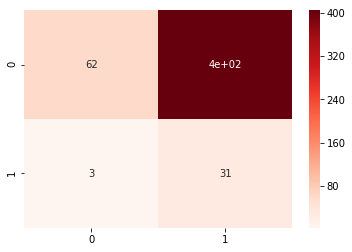

In [729]:
# Métricas

# Matriz de confusão
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

In [730]:
accuracy_nb = accuracy_score(y_test, y_pred)
print('Acurácia Naive-Bayes: ', accuracy_nb)

Acurácia Naive-Bayes:  0.186


In [731]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.186
Precision: 0.07126436781609195
Recall: 0.9117647058823529


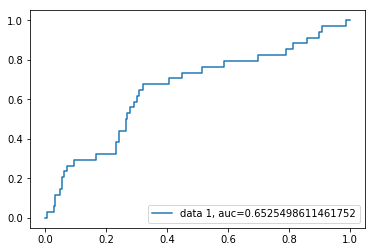

In [732]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Adaboost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(x_train,y_train)
y_pred = adaboost.predict(x_test)

In [735]:
accuracy_adaboost = accuracy_score(y_test, y_pred)
print('Acurácia AdaBoost: ', accuracy_adaboost)

Acurácia AdaBoost:  0.932


In [736]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.932
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


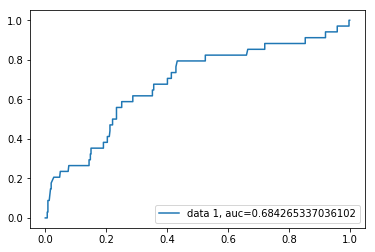

In [737]:
y_pred_proba = adaboost.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Escolhendo o modelo
knn = KNeighborsClassifier(n_neighbors = 2)
# Treinando o modelo com dados de treino
knn.fit(x_train, y_train)
# Predizindo os labels para os dados de teste
y_pred = knn.predict(x_test)

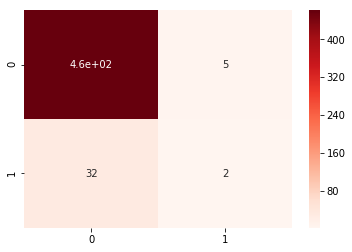

In [740]:
# Matriz de confusão
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

In [741]:
# Acurácia
accuracy_knn = accuracy_score(y_test, y_pred)
print('Acurácia knn ', accuracy_knn)

Acurácia knn  0.926


In [742]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.926
Precision: 0.2857142857142857
Recall: 0.058823529411764705


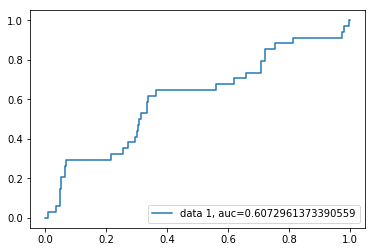

In [743]:
y_pred_proba = mlp.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### MLP

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
# Escolhendo o modelo
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=100, alpha=1e-4,
                     solver='sgd', tol=1e-4, random_state=1, learning_rate_init=.01)

# Treinando o modelo com dados de treino
mlp.fit(x_train, y_train)
# Predizindo os labels para os dados de teste
y_pred = mlp.predict(x_test)

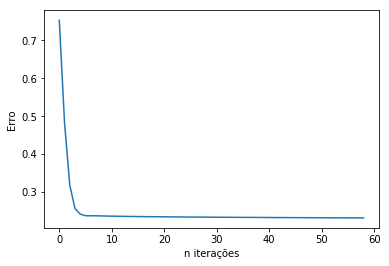

In [746]:
# Métricas 

# Curva de persa
loss_values =mlp.loss_curve_
plt.plot(loss_values)
plt.xlabel("n iterações")
plt.ylabel("Erro")
plt.show()

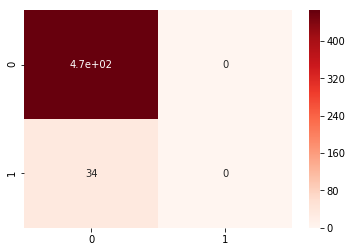

In [747]:
# Matriz de confusão
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

In [748]:
# Acurácia
accuracy_mlp = accuracy_score(y_test, y_pred)
print('Acurácia mlp ', accuracy_mlp)

Acurácia mlp  0.932


In [749]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.932
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


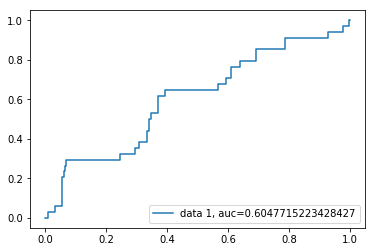

In [750]:
y_pred_proba = mlp.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Saving feature names for later use
lista_caracteristicas = list(X.columns)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)

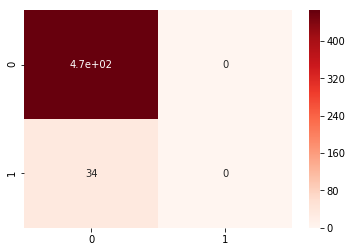

In [752]:
# Métricas

# Matriz de confusão
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

In [753]:
accuracy_random_forest = accuracy_score(y_test, y_pred)
print('Acurácia Random Forest: ', accuracy_random_forest)

Acurácia Random Forest:  0.932


In [754]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.932
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


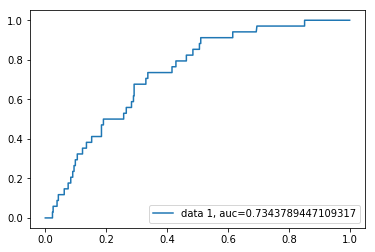

In [755]:
y_pred_proba = random_forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [756]:
# Recuperar importância das características
importancias = list(random_forest.feature_importances_)

# Lista de tuplas com variável e importância
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(lista_caracteristicas, importancias)]

# Ordenar as caracteristicas da mais importante para a menos importante
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Imprimir características e importâncias
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances];

Variável: VALOR_PARCELA        Importância: 0.3
Variável: renda_liquida        Importância: 0.25
Variável: VALOR_CDC            Importância: 0.23
Variável: LINHA_CDC            Importância: 0.15
Variável: estado_civil_2       Importância: 0.02
Variável: estado_civil_4       Importância: 0.02
Variável: estado_civil_0       Importância: 0.01
Variável: estado_civil_1       Importância: 0.01
Variável: estado_civil_3       Importância: 0.01
Variável: estado_civil_5       Importância: 0.0


#### Regressão Logística

In [0]:
# Separando a coluna de label e valor do prêmio do restante do dataframe
X = df.drop(columns=['IN_PROTEGIDO','VALOR_PREMIO','estado_civil'])
y = df['IN_PROTEGIDO']
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [758]:
mLogit = sm.Logit(y,X)

mLogit_res = mLogit.fit()

print ('------------------------------------')
print ('Regression Summary')
print ('------------------------------------')
print (mLogit_res.summary())

Optimization terminated successfully.
         Current function value: 0.237716
         Iterations 8
------------------------------------
Regression Summary
------------------------------------
                           Logit Regression Results                           
Dep. Variable:           IN_PROTEGIDO   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 May 2019   Pseudo R-squ.:               0.0004998
Time:                        19:17:50   Log-Likelihood:                -475.43
converged:                       True   LL-Null:                       -475.67
                                        LLR p-value:                    0.9981
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
IDADE  

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Separando a coluna de label e valor do prêmio do restante do dataframe
X = df.drop(columns=['IN_PROTEGIDO','VALOR_PREMIO','uf','IDADE'])
y = df['IN_PROTEGIDO']
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

# Separando grupo de testes e treinamento
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [761]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


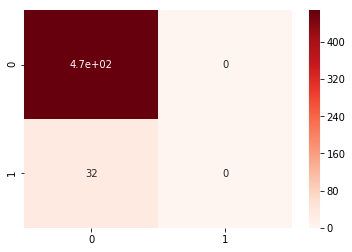

In [762]:
# Métricas

# Matriz de confusão
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="Reds")
plt.show()

In [763]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.936
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


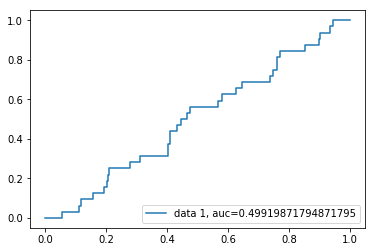

In [764]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


###  Conclusão


Embora nenhum dos modelos testados tenha sido confiável na sua capacidade de predição para os resultados desejados, pôde-se extrair algumas análises e características a partir do modelo de Random Forest e outros.

Os clientes tendem a preferir prêmios mais baixos para contratação do seguro. Os CDCs menores possuem mais chances de terem um seguro aceito no momento de sua contratação e empréstimos com parcelas menores do que R\$ 1150,00 possuem mais chances de terem seguro vinculado. A renda do cliente e o valor da parcela também influenciam, principalmente sob a ótica do Random Forest.

A contratação de seguros, de modo geral, ainda é pensada como "eu pago para não usar". Considerando-se a baixa adesão dos clientes a esta forma de seguro, crédito protegido, o ideal seria a melhor divulgação deste seguimento, ainda pouco conhecido dos clientes. Outro ponto a ser levantado seria a inclusão de prêmios (pontos Livelo, por exemplo), mediante a contratação, ou mesmo um abatimento do valor da parcela/taxa de juros.

Uma forma de se testar esta nova abordagem seria por meio de teste A/B com diferentes seguimentos de clientes, respeitando as características de propensão à contratação, levantadas acima.